<a href="https://colab.research.google.com/github/ShawnLiu119/Pricing-compratio-vs-unit-OLSRegression/blob/main/DS_Technical_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python
This test is ‘open-internet’. Please feel free to quickly look for answers online if you don’t know how to do something. Please do not distribute. 

### Read In Data
1. Read the csv files main_data and product_category_id into Jupyter Notebook
2. Merge the two csv files in a way that ensures no observations in main_data can be dropped
3. What % of observations have inventory < 10

In [125]:
import pandas as pd
import numpy as np

In [126]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [127]:
path = '/content/mydrive/MyDrive/homedepo/'

In [187]:
df_main = pd.read_csv(path + 'main_data.csv')
df_main.head()

,product_id,date,units_sold,price,competitor_price,inventory
0,512003783,1/21/2016,302.91,55.27,55.27,374.0
1,512003783,2/16/2016,156.35,55.27,55.27,374.0
2,512003783,2/28/2016,669.33,55.27,55.27,374.0
3,512003783,2/29/2016,376.20,55.27,55.27,213.0
4,512003783,3/4/2016,205.20,55.27,55.27,374.0


In [188]:
df_pa = pd.read_csv(path + 'product_category_id.csv')
df_pa.head()

,product_category_id,product_id
0,1,512464615
1,1,512464662
2,1,512319985
3,1,512319159
4,1,512319986


In [189]:
df = pd.merge(df_main, df_pa, on = 'product_id', how ='left')
df.head()

,product_id,date,units_sold,price,competitor_price,inventory,product_category_id
0,512003783,1/21/2016,302.91,55.27,55.27,374.0,4.0
1,512003783,2/16/2016,156.35,55.27,55.27,374.0,4.0
2,512003783,2/28/2016,669.33,55.27,55.27,374.0,4.0
3,512003783,2/29/2016,376.20,55.27,55.27,213.0,4.0
4,512003783,3/4/2016,205.20,55.27,55.27,374.0,4.0


In [190]:
inv = len(df[df['inventory']<10])
total = len(df)

perc_inv_10 = inv / total 
print(perc_inv_10)

0.032512772875058056


### Sample Function

Create a function that:
Inputs: A Dataframe and a list of column names <br> 
Operation inside the function: Add a new column to the Dataframe with the logarithm of the original column value for the columns in the list of column names. This adds one new column for each column in the list of column names <br>
Returns: The dataframe with all original columns intact plus new columns with the logarithm of each column indicated by the list of column names <br>

Apply the function above on the columns units_sold and inventory

In [191]:
import math

def trans(df, cols):
  for col in cols:
    name = col + '_log'
    df[name] = df[col].apply(lambda x: math.log(x) if x>0 else 'na')
  return df

In [192]:
cols = ['units_sold', 'inventory']

trans(df, cols)

,product_id,date,units_sold,price,competitor_price,inventory,product_category_id,units_sold_log,inventory_log
0,512003783,1/21/2016,302.91,55.27,55.27,374.0,4.0,5.713436,5.924256
1,512003783,2/16/2016,156.35,55.27,55.27,374.0,4.0,5.052097,5.924256
2,512003783,2/28/2016,669.33,55.27,55.27,374.0,4.0,6.506277,5.924256
3,512003783,2/29/2016,376.20,55.27,55.27,213.0,4.0,5.930121,5.361292
4,512003783,3/4/2016,205.20,55.27,55.27,374.0,4.0,5.323985,5.924256
...,...,...,...,...,...,...,...,...,...
2148,515775953,4/6/2017,231.82,218.91,218.90,132.0,3.0,5.445961,4.882802
2149,515775953,9/17/2017,334.40,221.66,221.65,102.0,3.0,5.812338,4.624973
2150,515775953,11/26/2017,224.34,199.64,199.63,102.0,3.0,5.413163,4.624973
2151,515775957,8/23/2017,631.45,1037.34,1037.34,29.0,6.0,6.448019,3.367296


### Regression
1. Filter the data to only product_category_id = 6:
2. Filter the data to only product_ids with over 50 dates
3. Run an OLS regression to identify the approximate % change in units sold for a 0.1 increase in the ratio between price and competitor_price. Include an intercept and product_id treated as a categorical variable but no other control variables
4. Summarize the regression output
5. Verbally: What parts of the summary should we primarily be concerned with?
6. Verbally: How would you interpret each part you identified above?
7. Verbally: What additional control variables could help us identify the true effect of competitor price ratio on units sold

In [193]:

df_new = df.copy()

df_new = df[df['product_category_id'] == 6]
pid = pd.DataFrame(df_new.groupby('product_id')['date'].size())

list_pid = list(pid[pid['date']>50].index.values)



In [194]:
df_ols = df_new[df_new['product_id'].isin(list_pid)]

In [195]:
type(df_ols)

pandas.core.frame.DataFrame

In [196]:
df_ols.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


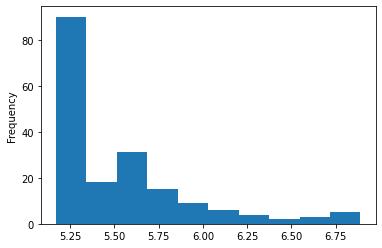

In [197]:
df_ols['units_sold_log'].astype('float').plot(kind='hist') #tured to be more normal distributed

In [198]:
import statsmodels.api as sm

df_ols['ratio'] = df['price'] / df['competitor_price'] 

df_ols.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,product_id,date,units_sold,price,competitor_price,inventory,product_category_id,units_sold_log,inventory_log,ratio
456,512319144,2/28/2016,205.38,156.62,156.61,337.0,6.0,5.324862,5.820083,1.000064
457,512319144,3/9/2016,352.29,156.62,156.61,330.0,6.0,5.864455,5.799093,1.000064
458,512319144,3/19/2016,278.83,156.62,156.61,308.0,6.0,5.630602,5.7301,1.000064
459,512319144,3/22/2016,278.83,156.62,156.61,301.0,6.0,5.630602,5.70711,1.000064
460,512319144,3/29/2016,205.38,156.62,156.61,242.0,6.0,5.324862,5.488938,1.000064


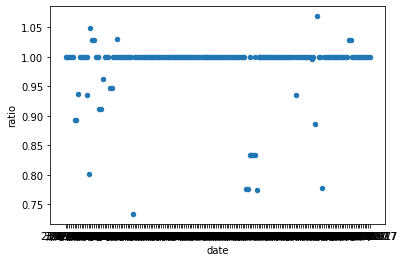

In [199]:
df_ols.plot.scatter('date', 'ratio')

In [200]:
pd.__version__

'1.3.5'

In [201]:
df_ols.sort_values('date', ascending=True).groupby('product_id')

In [202]:
df_ols[['chg_unit', 'chg_price']] = 0
df_t = pd.DataFrame()
for pdt in list_pid:
  df = df_ols[df_ols['product_id'] == pdt].reset_index() #reset_index so that the index starts from 0
  for i in range(len(df)):
    if i == 0:
      df.loc[i, 'chg_unit'] = 0
      df.loc[i, 'chg_price'] = 0
    else:
      df.loc[i, 'chg_unit'] = (df.loc[i, 'units_sold'] - df.loc[i-1, 'units_sold']) / df.loc[i-1, 'units_sold']
      df.loc[i, 'chg_price'] = (df.loc[i, 'ratio'] - df.loc[i-1, 'ratio']) / df.loc[i-1, 'ratio']
  df_t = pd.concat([df_t, df], ignore_index=True) #ignore_index can help avoid duplicate of original index from previous dataframes

df_t

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


,index,product_id,date,units_sold,price,competitor_price,inventory,product_category_id,units_sold_log,inventory_log,ratio,chg_unit,chg_price
0,456,512319144,2/28/2016,205.38,156.62,156.61,337.0,6.0,5.324862,5.820083,1.000064,0.000000,0.0
1,457,512319144,3/9/2016,352.29,156.62,156.61,330.0,6.0,5.864455,5.799093,1.000064,0.715308,0.0
2,458,512319144,3/19/2016,278.83,156.62,156.61,308.0,6.0,5.630602,5.7301,1.000064,-0.208521,0.0
3,459,512319144,3/22/2016,278.83,156.62,156.61,301.0,6.0,5.630602,5.70711,1.000064,0.000000,0.0
4,460,512319144,3/29/2016,205.38,156.62,156.61,242.0,6.0,5.324862,5.488938,1.000064,-0.263422,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,878,512319173,10/1/2017,227.79,114.01,114.00,176.0,6.0,5.428424,5.170484,1.000088,0.232897,0.0
179,879,512319173,10/2/2017,184.76,114.01,114.00,213.0,6.0,5.219058,5.361292,1.000088,-0.188902,0.0
180,880,512319173,11/5/2017,230.22,114.01,114.00,286.0,6.0,5.439035,5.655992,1.000088,0.246049,0.0
181,881,512319173,11/29/2017,237.60,114.01,114.00,315.0,6.0,5.470589,5.752573,1.000088,0.032056,0.0


In [218]:
x = df_t[df_t['chg_price'] != 0][['chg_price', 'product_id']]
pid_dummy = pd.get_dummies(x['product_id']) # add categorical variable into input
x = pd.concat([x, pid_dummy], axis = 1)
x = x[['chg_price',512319144, 512319173]]

y = df_t[df_t['chg_price'] != 0]['chg_unit']

print('input shape is {}'.format(x.shape))
print('output shape is {}'.format(y.shape))

input shape is (35, 3)
output shape is (35,)


In [220]:
#add constant
x = sm.add_constant(x)

#feed into the regression model
model = sm.OLS(y,x)
results = model.fit()
results.params

x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               chg_unit   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.7206
Date:                Mon, 21 Nov 2022   Prob (F-statistic):              0.494
Time:                        00:55:20   Log-Likelihood:                -50.732
No. Observations:                  35   AIC:                             107.5
Df Residuals:                      32   BIC:                             112.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3112      0.123      2.530      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [221]:
## so for every 10% of increase in ratio between price and competitor price, there is 6.3% units sold increase

## R square, F stats, coef, and p value are parameters i concerned about
## R squre is low as well as adjust r square, indicating low linearity relationship

#F test tells the goodness of fit of a regression.
#Skewness and kurtosis for the normal distribution are 0 and 3 respectively

### Sample Class
1. Set up a class with a method called increment. The increment method should return a value that increases each time it is called
2. The class should track the number of times increment has been called without an external reference or global variable
3. Create an instance of your class, make a few calls to the increment method to demonstrate it is increasing each time

In [234]:
class Test:
    def __init__(self, start):
      self.increment_ = start
    
    def increment(self):
      self.increment_ += 1

In [235]:
def main():
    test = Test(0)
    test.increment()
    test.increment()
    test.increment()
    test.increment()
    print(test.increment_)

In [236]:
main()

4


# SQL
You will not have the access to the database for SQL, instead please type your answer to question in text. 
You may use an empty Jupyter Cell, or any editor you feel comfortable with

The data below is a sample, assume the full table is large (millions or billions of rows). Table contains all sales 2016-present

![TBL_SALES%202022-06-16%20060133.png](attachment:TBL_SALES%202022-06-16%20060133.png)

Write a query that finds the rank customers in terms of 2017 sales units (largest to smallest), and return the top 100 customers, with their unit sales, and their rank, and a column called TOP_10_FLG that is 'Y' for the top 10 customers and 'N' for all other customers.

WITH t AS
(SELECT 
    CUSTOMER_ID,
    SUM(SALES_QTY) as SALE
FROM TBL_SLAES
WHERE YEAR(SALES_DT) = 2017
GROUP BY CUSTOMER_ID)

SELECT
    t.CUSTOMER_ID, 
    t.SALE,
    RANK() OVER (ORDER BY t.SALE) as rk,
    (CASE 
       WHEN rk < = 10 THEN 'Y'
       ELSE 'N
    END) as TOP_10_FLG
FROM t
WHERE rk <= 100





